Using reinforcement learning to teach AI to play doom

Get vizdoom up and running

In [2]:
!pip install vizdoom

  Using cached https://files.pythonhosted.org/packages/fa/f2/f4ec28f935f980167740c5af5a1908090a48a564bed5e689f4b92386d7d9/numpy-1.22.3-cp38-cp38-win_amd64.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Remeber to clone the Vizdoom gihub for setup files

Import dependencies

In [1]:
from vizdoom import *
import random
import time
import numpy as np

initialise game

In [2]:
#setup
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [3]:
game.close()

In [7]:
#actions we can take
actions = np.identity(3, dtype=np.uint8)
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [8]:
#random before agent training
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [9]:
game.new_episode()
game.is_episode_finished()

False

In [14]:
#loop to play game randomly
game.new_episode()
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        #get the game state
        state = game.get_state()
        #get game image
        img = state.screen_buffer
        #get game variables (ammo)
        info = state.game_variables
        #take random action
        reward = game.make_action(random.choice(actions),4)
        #print action reward
        print('reward: ',reward)
        time.sleep(0.02)
    print('Result: ',game.get_total_reward())
    time.sleep(2)

reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  97.0
Result:  -163.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  99.0
Result:  87.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
rewa

KeyboardInterrupt: 

In [15]:
game.close()

Bring in openAIgym for RL

In [16]:
%pip install gym

  Using cached https://files.pythonhosted.org/packages/87/86/3f5467531428b6ce6f3c12d3121b4304d2ea1536a50775a4df036add37b8/gym-0.23.1.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/92/f2/c48787ca7d1e20daa185e1b6b2d4e16acd2fb5e0320bc50ffc89b91fa4d7/importlib_metadata-4.11.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/78/b994342df09f68634e38e86db6341b28079228615a4e8060a9cd0e6d8020/gym_notices-0.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/80/0e/16a7ee38617aab6a624e95948d314097cc2669edae9b02ded53309941cfc/zipp-3.8.0-py3-none-any.whl
  Created wheel for gym: filename=gym-0.23.1-cp38-none-any.whl size=701376 s

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
#import opeaigym dependencies
from gym import Env
from gym.spaces import Discrete, Box
import cv2

Define environment class

In [34]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('github/VizDoom/scenarios/basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()


In [35]:
env = VizDoomGym()

In [106]:
env.step(2)

(array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]),
 99.0,
 True,
 0)

In [38]:
env.close()

In [36]:
from stable_baselines3.common import env_checker

In [37]:
env_checker.check_env(env)

In [81]:
#%pip install matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached Pillow-9.1.0-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached kiwisolver-1.4.2-cp38-cp38-win_amd64.whl (55 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from matplotlib import pyplot as plt

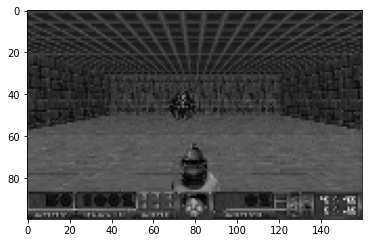

In [99]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

Setup callback

In [109]:
%pip install torch torchvision torchaudio

  Using cached torchvision-0.12.0-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached torchaudio-0.11.0-cp38-cp38-win_amd64.whl (372 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached torch-1.11.0-cp38-cp38-win_amd64.whl (158.0 MB)
  Using cached torchvision-0.12.0-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached torchaudio-0.11.0-cp38-cp38-win_amd64.whl (372 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)


In [110]:
%pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.5.0-py3-none-any.whl (177 kB)
  Using cached gym-0.21.0-py3-none-any.whl
     -------------------------------------- 10.6/10.6 MB 830.5 kB/s eta 0:00:00
     -------------------------------------- 935.0/935.0 KB 1.6 MB/s eta 0:00:00
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
  Using cached click-8.1.2-py3-none-any.whl (96 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached AutoROM.accept_rom_license-0.4.2-py3-none-any.whl
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached Werkzeug-2.1.1-py3-none-any.whl (224 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Us

In [11]:
import os
from stable_baselines3.common.callbacks import BaseCallback

In [12]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [39]:
CHECKPOINT_DIR = './train/train_basic_2'
LOG_DIR = './logs/log_basic'

In [40]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

Train the model

In [16]:
from stable_baselines3 import PPO

In [41]:
env = VizDoomGym()

In [44]:
model = PPO('CnnPolicy',env=env,tensorboard_log=LOG_DIR,verbose=1,learning_rate=0.0001,n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [45]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 32.4     |
|    ep_rew_mean     | -85      |
| time/              |          |
|    fps             | 30       |
|    iterations      | 1        |
|    time_elapsed    | 66       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 29.7        |
|    ep_rew_mean          | -64.5       |
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 2           |
|    time_elapsed         | 205         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010888128 |
|    clip_fraction        | 0.229       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | -0.000146 

In [46]:
new_model = PPO.load('./train/train_basic_2/best_model_100000')

In [47]:
from stable_baselines3.common.evaluation import evaluate_policy

In [48]:
env = VizDoomGym(render=True)


In [27]:
mean_reward, _ = evaluate_policy(new_model, env, n_eval_episodes=10)

c:\Users\Max Oblein\Documents\Python Scripts\doomAI\doomai\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [28]:
mean_reward

51.9

In [51]:
env = VizDoomGym(render=True)
for episode in range(25): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = new_model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total Reward for episode 0 is 79.0
Total Reward for episode 1 is 95.0
Total Reward for episode 2 is 95.0
Total Reward for episode 3 is 95.0
Total Reward for episode 4 is 75.0
Total Reward for episode 5 is 95.0
Total Reward for episode 6 is 95.0
Total Reward for episode 7 is 95.0
Total Reward for episode 8 is 95.0
Total Reward for episode 9 is 95.0
Total Reward for episode 10 is 71.0
Total Reward for episode 11 is 95.0


KeyboardInterrupt: 

In [52]:
env.close()